In [1]:
# Importamos las bibliotecas necesarias
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Descargamos datos históricos de Apple (AAPL) usando yfinance
data = yf.download('AAPL', start='2020-01-01', end='2024-09-24')

# Usamos el precio de cierre ajustado como nuestra variable dependiente
data['Date'] = data.index
data['Day'] = np.arange(len(data))  # Creamos un índice de días

# Definimos la característica (el día) y la etiqueta (el precio de cierre)
X = data[['Day']]  # Día como característica
y = data[['Adj Close']]  # Precio de cierre ajustado como etiqueta

[*********************100%***********************]  1 of 1 completed


In [3]:
# Dividimos los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos el modelo de regresión lineal
modelo = LinearRegression()

# Entrenamos el modelo
modelo.fit(X_train, y_train)

# Realizamos predicciones
y_pred = modelo.predict(X_test)

Error cuadrático medio (MSE): 274.6958847757935
Coeficiente de determinación (R²): 0.8096065692788612


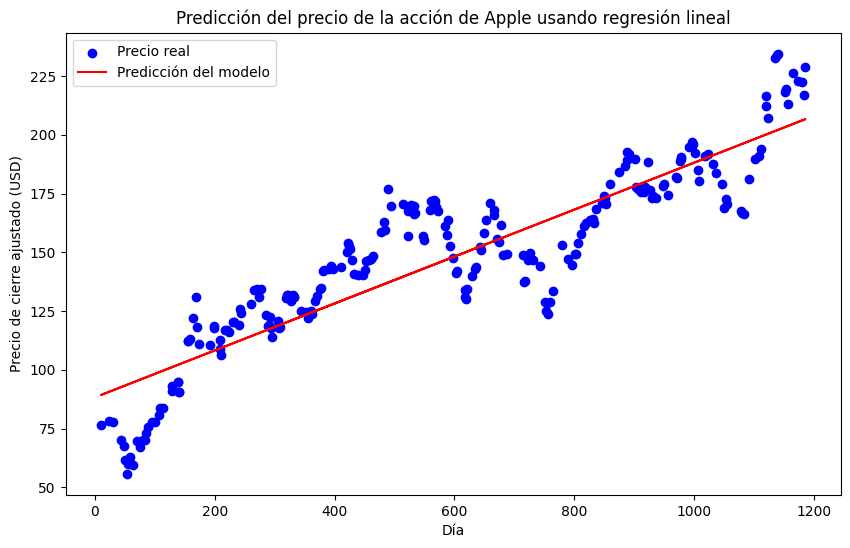

Coeficiente (pendiente): 0.09986924780984627
Intersección (ordenada al origen): 88.26056591701396


In [6]:
# Evaluamos el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

# Visualizamos las predicciones y el precio real
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Precio real')
plt.plot(X_test, y_pred, color='red', label='Predicción del modelo')
plt.xlabel('Día')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.title('Predicción del precio de la acción de Apple usando regresión lineal')
plt.legend()
plt.show()

# Imprimimos los coeficientes del modelo
print(f"Coeficiente (pendiente): {modelo.coef_[0][0]}")
print(f"Intersección (ordenada al origen): {modelo.intercept_[0]}")